In [3]:

import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from textblob import TextBlob
from wordcloud import WordCloud

In [8]:
text = "The movie was fantastic! I really enjoyed it."
print("Sample Sentiment:", TextBlob(text).sentiment)

df = pd.read_csv(r"C:\Users\Tech Mehal\NLP THEORY\For Github\covid-19_vaccine_tweets_with_sentiment.csv",
    encoding="latin1")
print(df.head())


Sample Sentiment: Sentiment(polarity=0.5, subjectivity=0.8)
       tweet_id  label                                         tweet_text
0  1.360342e+18      1  4,000 a day dying from the so called Covid-19 ...
1  1.382896e+18      2  Pranam message for today manifested in Dhyan b...
2  1.375673e+18      2  Hyderabad-based ?@BharatBiotech? has sought fu...
3  1.381311e+18      1  Confirmation that Chinese #vaccines "dont hav...
4  1.362166e+18      3  Lab studies suggest #Pfizer, #Moderna vaccines...


In [9]:
tokenizer = RegexpTokenizer(r'\w+')
ps = PorterStemmer()
en_stop = set(stopwords.words('english'))

def getCleanedText(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    tokens = [t for t in tokens if t not in en_stop]
    tokens = [ps.stem(t) for t in tokens]
    return " ".join(tokens)

df['tweet_text'] = df['tweet_text'].apply(getCleanedText)


In [10]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df['Polarity'] = df['tweet_text'].apply(getPolarity)



In [11]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df['Analysis'] = df['Polarity'].apply(getAnalysis)

print(df[['tweet_text','Subjectivity','Polarity','Analysis']].head())


                                          tweet_text  Subjectivity  Polarity  \
0  4 000 day die call covid 19 vaccin dailybeast ...      0.000000  0.000000   
1  pranam messag today manifest dhyan meenapranam...      0.600000  0.333333   
2  hyderabad base bharatbiotech sought fund gover...      1.000000 -0.800000   
3  confirm chines vaccin high protect rate accord...      0.313333  0.020000   
4  lab studi suggest pfizer moderna vaccin protec...      0.000000  0.000000   

   Analysis  
0   Neutral  
1  Positive  
2  Negative  
3  Positive  
4   Neutral  


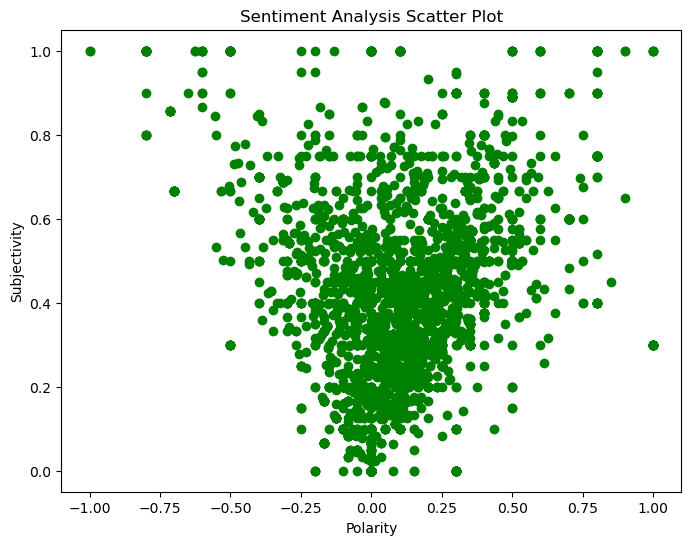

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'], df['Subjectivity'], color='green')
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()


In [13]:
positive = df[df['Analysis'] == 'Positive']
negative = df[df['Analysis'] == 'Negative']
neutral  = df[df['Analysis'] == 'Neutral']

print("Positive tweets:", round((positive.shape[0]/df.shape[0])*100, 2), "%")
print("Negative tweets:", round((negative.shape[0]/df.shape[0])*100, 2), "%")
print("Neutral tweets :", round((neutral.shape[0]/df.shape[0])*100, 2), "%")


Positive tweets: 37.15 %
Negative tweets: 14.1 %
Neutral tweets : 48.75 %


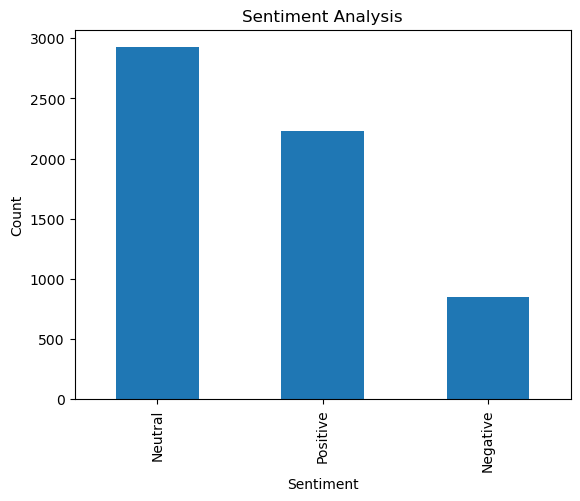

In [14]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()